### $\color{LightBlue}{\text{Imports Needed}}$

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle

### $\color{LightBlue}{\text{File Input Handling}}$

In [2]:
#Files for the data to import
Acc_files = ['Data/Acc_Circle_1.csv', 'Data/Acc_Circle_2.csv', 'Data/Acc_Circle_3.csv', 'Data/Acc_Stand_1.csv',
            'Data/Acc_Stand_2.csv','Data/Acc_Stand_3.csv', 'Data/Acc_Down_1.csv', 'Data/Acc_Down_2.csv', 'Data/Acc_Down_3.csv']
Gscope_files = ['Data/Gscope_Circle_1.csv', 'Data/Gscope_Circle_2.csv', 'Data/Gscope_Circle_3.csv', 'Data/Gscope_Stand_1.csv',
            'Data/Gscope_Stand_2.csv','Data/Gscope_Stand_3.csv', 'Data/Gscope_Down_1.csv', 'Data/Gscope_Down_2.csv', 'Data/Gscope_Down_3.csv']

#Empty list to append the data into
Acc_dataframes = []
Gscope_dataframes = []

#Loop over every file and add it to the list for Accelerometer and Gscope
for file in Acc_files:
    Acc_dataframes.append(pd.read_csv(file, usecols=[1,2,3], names=['ax', 'ay', 'az'], skiprows=[0]))

for file in Gscope_files:
    Gscope_dataframes.append(pd.read_csv(file, usecols=[1,2,3], names=['gx', 'gy', 'gz'], skiprows=[0]))

### $\color{LightBlue}{\text{Plotting the Accelerometer Data}}$

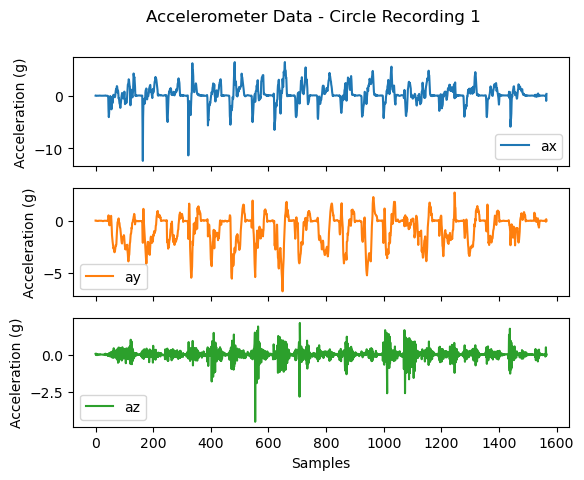

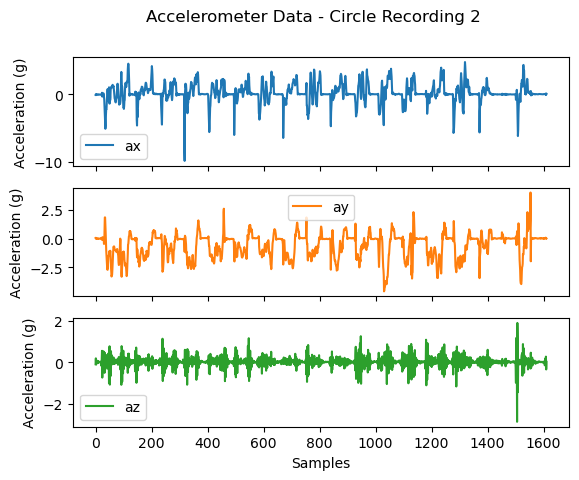

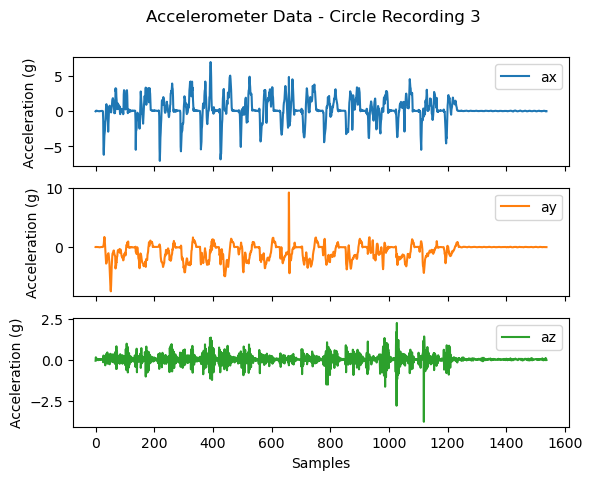

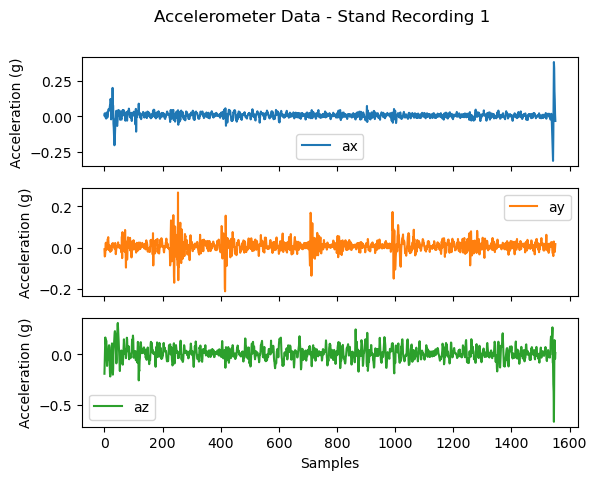

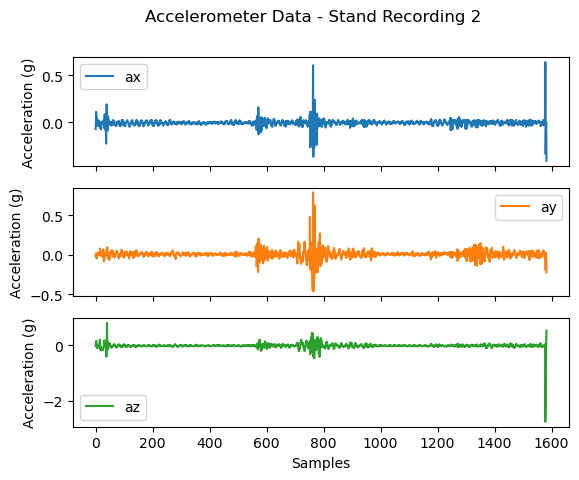

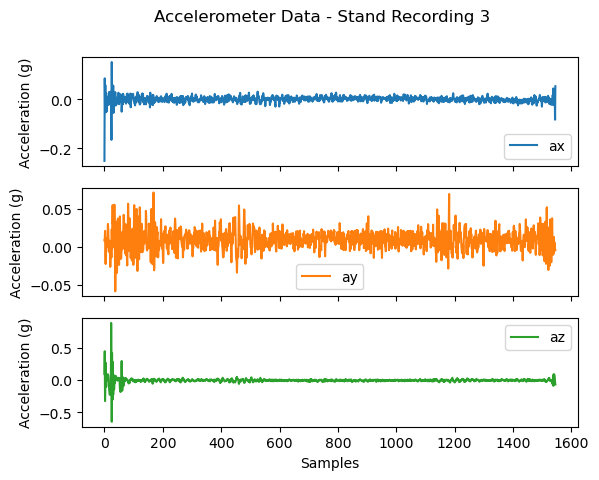

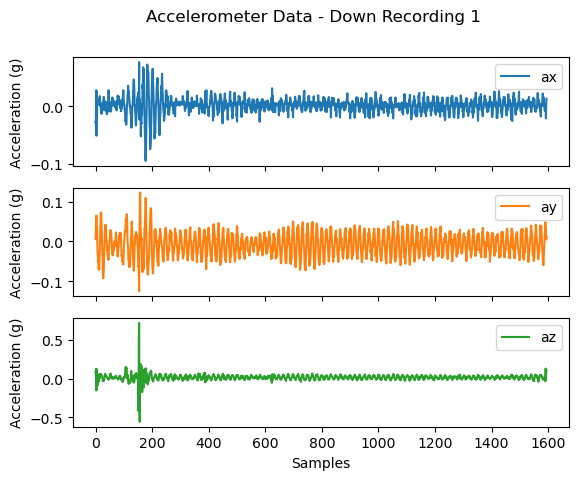

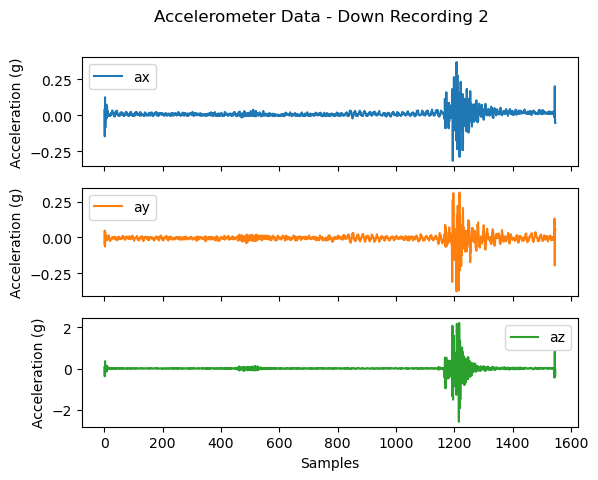

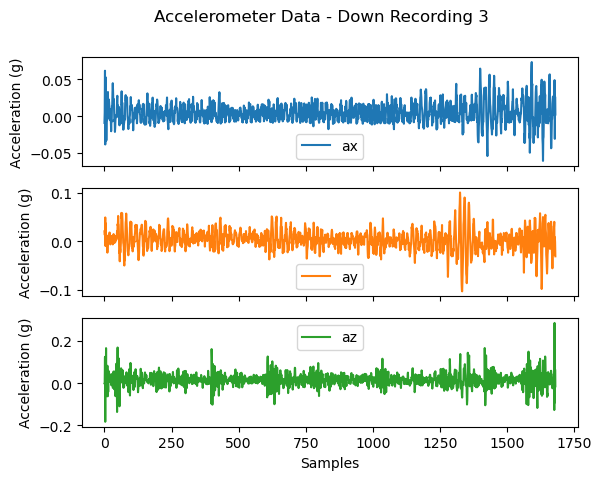

In [3]:
# Iterate over every file and plot the graph for it
for i, acc_data in enumerate(Acc_dataframes):
    filename = os.path.basename(Acc_files[i]) # Get the file name
    measurement_type = filename.split('_')[1]
    title = f"Accelerometer Data - {measurement_type} Recording {i % 3 + 1}" # Fix title for the graph
    acc_data.plot(subplots=True, title=title, xlabel="Samples", ylabel="Acceleration (g)")
    plt.show()

### $\color{LightBlue}{\text{Plotting The Gyroscope Data}}$

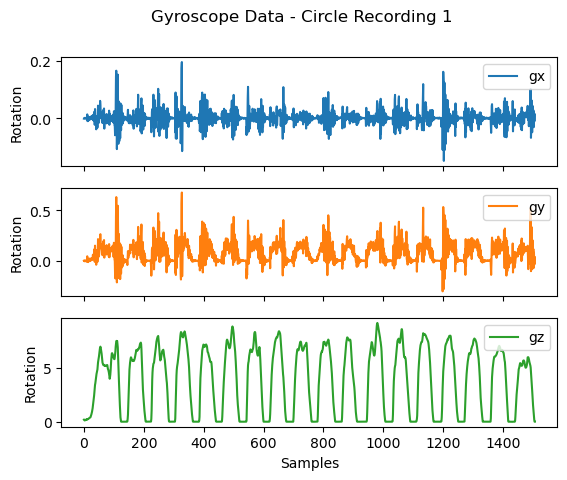

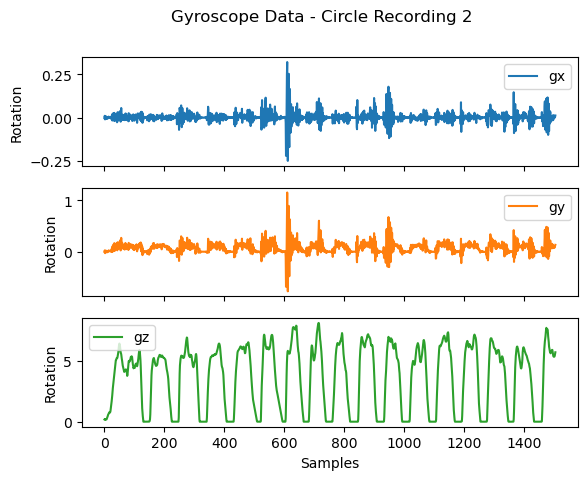

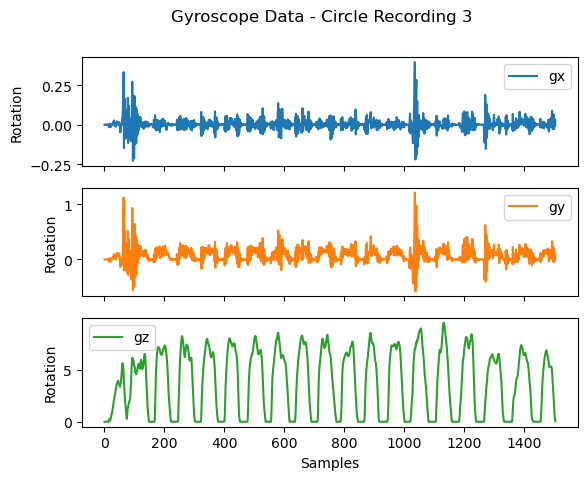

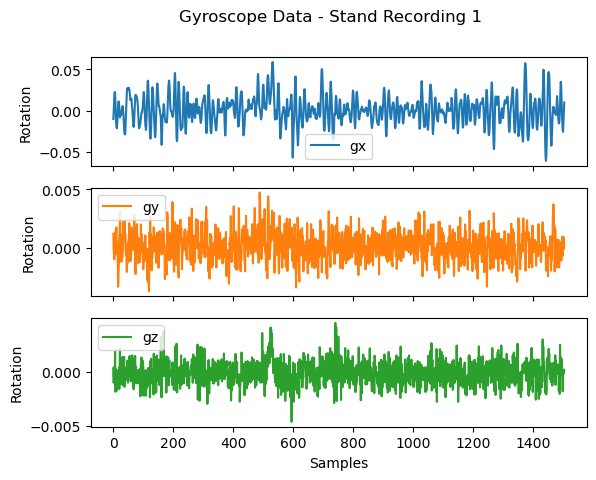

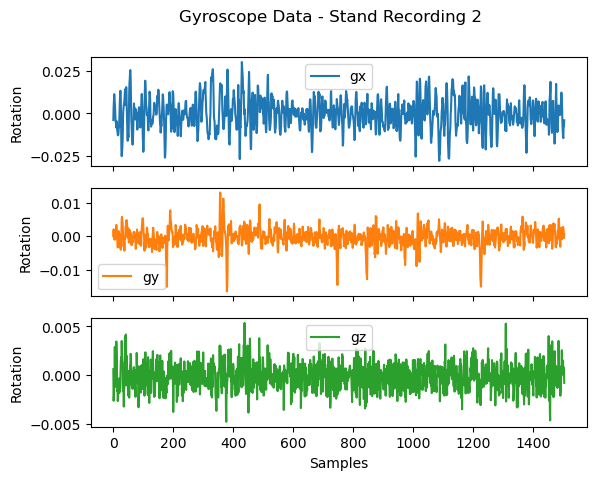

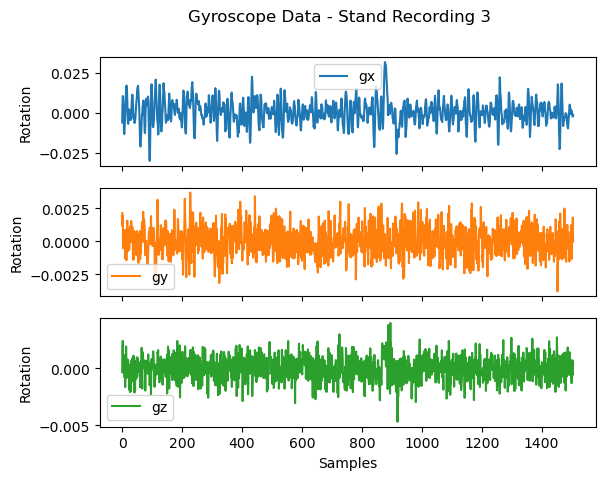

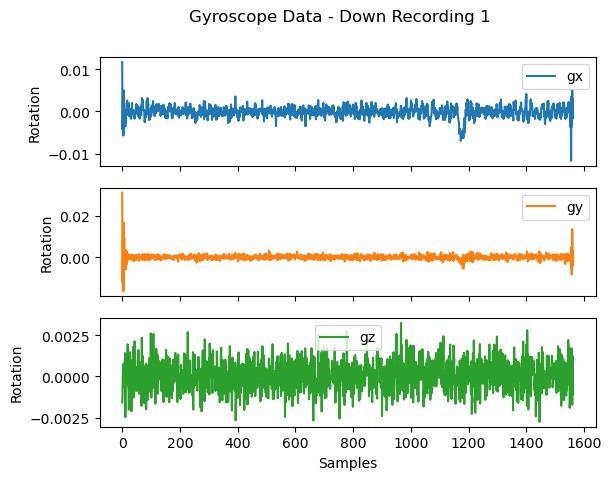

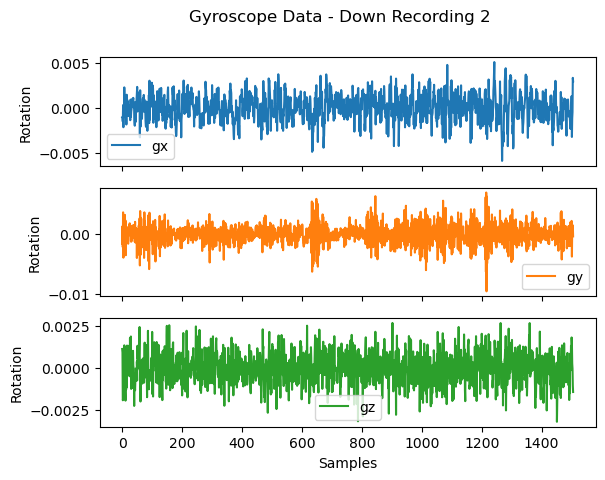

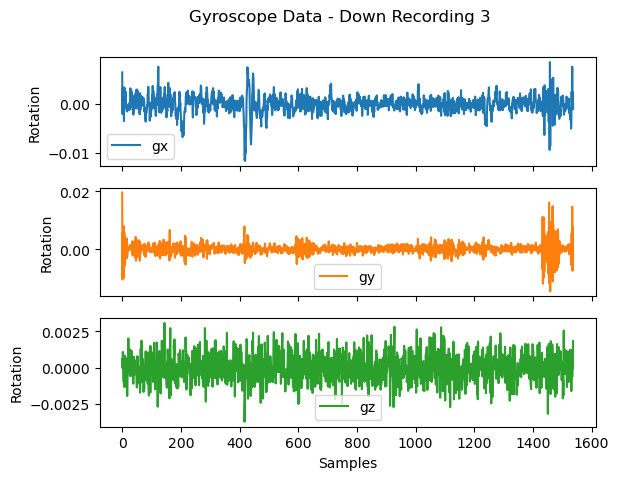

In [4]:
# Iterate over every file and plot the graph for it
for i, gscope_data in enumerate(Gscope_dataframes):
    filename = os.path.basename(Gscope_files[i]) # Get the file name
    measurement_type = filename.split('_')[1]
    title = f"Gyroscope Data - {measurement_type} Recording {i % 3 + 1}" # Fix title for the graph
    gscope_data.plot(subplots=True, title=title, xlabel="Samples", ylabel="Rotation")
    plt.show()

# Questions to Answer:

### $\color{Orange}{\text{What are we measuring with the Accelerometer?}}$
The accelerometer measures the vibration and motion of a structure.

### $\color{Orange}{\text{What are we measuring the with Gyroscope?}}$
The gyroscope measures rotational motion.

### $\color{Orange}{\text{By looking at the plots can you see the difference between the the three classes?}}$

### Accelerometer:
Moving in a Circle: The phone was layed flat on the table and rotated around the Z-axis, the accelerometer detected movement on the X and Y axes but not on the Z since there is no movement on the Z axis.

Standing Up: The phone was placed vertically standing up. The accelerometer didn't detect much movement on the X and Z axes, but movement on the Y-Axis was detected.

Laying Down: The phone was layed down on its back on the table, small movement was detected due to small vibrations and movements around the phone.


### Gyroscope:
Moving in a Circle: The experiment was the same as the accelerometer. The gyroscope detected most of the rotations on the Z-axis but not much on the X and Y axes.

Standing Up: No rotation on all axes.

Laying Down: No rotation on all axes.


### $\color{LightBlue}{\text{Saving the data to their respective folders}}$

In [5]:
def saveToTestFolder(testDF, classname):
    directory = "Test Sets"
    filename = f"{classname}.pkl"
    os.makedirs(directory, exist_ok=True)
    filepath = os.path.join(directory, filename)
    testDF.to_pickle(filepath)

def saveToTrainingFolder(TrainingDF, classname):
    directory = "Training Sets"
    filename = f"{classname}.pkl"
    os.makedirs(directory, exist_ok=True)
    filepath = os.path.join(directory, filename)
    TrainingDF.to_pickle(filepath)

### $\color{LightBlue}{\text{Parsing the raw data in the "Data" directory}}$

In [6]:
#Function to parse the data read into their respective arrays
#Parameters:
#acc_dfs: Array of accelerometer dataframes that were read and stored in this array
#gscope_dfs: Array of Gyroscope dataframes that were read and stored in this array
#data_classes: Array of classes of the different phone position (Circle, Down, Stand)
def parseDataframes(acc_dfs, gscope_dfs, data_classes):
    count = 0
    for index, (acc_df, gscope_df) in enumerate(zip(acc_dfs, gscope_dfs)):
        combinedDF = pd.concat([acc_df, gscope_df], axis=1)
        if ((index + 1) % 3 == 0):
            # Add to test set
            combinedDF['Class'] = data_classes[count]
            saveToTestFolder(combinedDF.dropna(), data_classes[count])
            count += 1
        else:
            if(index % 3 == 0) or (index + 1) % 3 == 2:
                if index % 3 == 0:
                    trainingDF1 = combinedDF
                    
                else:
                    trainingPair = pd.concat([trainingDF1, combinedDF], axis=0, ignore_index=True)
                    trainingPair['Class'] = data_classes[count]
                    saveToTrainingFolder(trainingPair.dropna(), data_classes[count])

### $\color{LightBlue}{\text{Handling loading and unpickling of the data}}$

In [17]:
# Function to load and unpickle the dataframe from test/training set
# Parameters:
# classname: The name of the class to unload (Circle, stand, down)
# set_type: The type of set to unload from (training, test)
def loadAndUnpickleDataFrame(classname, set_type):
    cwd = os.getcwd()
    directory = os.path.join(cwd, f"{set_type} Sets")
    filename = f"{classname}.pkl"
    filepath = os.path.join(directory, filename)
    if os.path.exists(filepath):
        df = pd.read_pickle(filepath)
        print(f"Loaded {set_type} set for class '{classname}'")
        return df
    else:
        print(f"File not found: {filepath}")
        return None

In [20]:
data_classes = ['Circle', 'Stand', 'Down']
parseDataframes(acc_dfs=Acc_dataframes, gscope_dfs=Gscope_dataframes, data_classes=data_classes)

test_stand_df = loadAndUnpickleDataFrame('Stand', 'Test')
print(test_stand_df.head())
print(test_stand_df.tail())

training_stand_df = loadAndUnpickleDataFrame('Stand', 'Training')
print(training_stand_df.head())
print(training_stand_df.tail())


Loaded Test set for class 'Stand'
         ax        ay        az        gx        gy        gz  Class
0 -0.250310  0.008188  0.097165 -0.006070  0.002143 -0.000360  Stand
1  0.084499  0.008230  0.448811  0.004641  0.001180  0.001932  Stand
2 -0.033411  0.020768 -0.326060  0.010362  0.001956  0.002378  Stand
3  0.056965 -0.009253 -0.092608  0.009776 -0.000526  0.000177  Stand
4 -0.052841 -0.022864  0.270670  0.004768  0.000565  0.000783  Stand
            ax        ay        az        gx        gy        gz  Class
1501  0.008888 -0.010723  0.006066 -0.000144  0.000456  0.000341  Stand
1502 -0.008784 -0.011759 -0.007117 -0.000374  0.000183  0.000312  Stand
1503 -0.000091 -0.001723  0.001169 -0.001905  0.000847 -0.000619  Stand
1504 -0.005672  0.030169 -0.005682 -0.002512  0.001808  0.000669  Stand
1505 -0.002458  0.022547  0.000892 -0.001550 -0.000020  0.000344  Stand
Loaded Training set for class 'Stand'
         ax        ay        az        gx        gy        gz  Class
0  0.007724 -